# Determining the Class of Districts in Toronto using Common Business Venues


# 1.	Introduction

Districts in prominent cities are always seeking to attract investors to their neighbourhoods. These investors often need to know if their proposed business type is suitable or associated with the class of the district of interest.  Certain district class may have common factors that may distinguish their class to attract more of a particular type of service over other types. Hence it becomes important to study the relationship between the class categories and the common types of business venues found in a city's districts. Districts are mostly categorised into high, medium and low classes depending on relative cost of property in the districts. This study seeks to determine the extent to which the common business categories found in a district, defines the class type of the district and the accuracy of machine learning tools in making the predictions. It also aims to highlight the most common business categories associated with high, medium and low class areas.

Toronto city, a prominent city with available and reliable data sources of its neighbourhoods, was used as a sample case study. Toronto city has 35 neighbourhood groups with distinct district numbers. The cost of housing index in each district was used to establish the class categories. From location dataset available, the distinct business venues and the frequency of visits was extracted for each district.



#### 1.1 Business Problem

The problem is, a would-be investor needs to determine which types of business groups are mostly found in high, middle, and low class districts. This knowledge is critical to the potential investor, planning in consideration of his/her budget.

The broad objective of this assignment is to establish if identified groups of most common business categories are able to define the class of the districts.

The specific objectives includes identifying which types of businesses are most found in high, middle and low class districts.


# 2. Source and Description of Data.
The cost of housing index of Toronto city was extracted from Toronto Regional Real Estate Board as culled in Storey’s real estate site https://storeys.com/median-home-price-35-toronto-neighbourhoods/. The specific variable used to represent Housing cost index was the Median Detached House Prices of Districts given in Canadian dollars

The coordinates of the districts was extracted using geolocator on the geopy python library. The Longitude and Latitudes were obtained for each Districts

The coordinates was applied for VENUES data from Foursquare dataset API at 1000m radius - being the approximate radius of the smallest district in Toronto City, C10, to avoid overlap of venues returned (Toronto City - Wikipedia).

The various districts in Toronto city categorized by there district numbers was sourced from Toronto city wikipedia site. https://en.wikipedia.org/wiki/Toronto

# 3. Methodology
In determining the relationships between the unique business venue catergories and the class categories of the district, descriptive statistical method was applied. The number of the various unique venue categories found in each district was used as the independent variable. The dependent variable is the class category of the district.


In [2]:
Methodology = {'Variable functions': ["Dependent", "Independent"], 'Variables': ["Class of District", "Common Business Categories"], 'Proxies':["Median Detached House Price Index"," Count of Unique Venue Categories"]}
Methodology = pd.DataFrame(data=Methodology)
Methodology

,Variable functions,Variables,Proxies
0,Dependent,Class of District,Median Detached House Price Index
1,Independent,Common Business Categories,Count of Unique Venue Categories


Inferential statistics, of histogram, box plot and the describe function in pandas dataframe was used on the dependent variable in order to enable the categorisation of the data into high, medium, and low classes. 
 
To analyse the varibles Python libraries were imported accordingly: Pandas, numpy, sklearn libraries to enable data wrangling and result testing; requests to enable data requests; geopy to convert addresses into latitude and longitude values; json to handle json files; matplotlib and folium to enable visualisation.

The venue categories of each district was obtained from foursquare API dataset requests. These categories was summed up and the average was obtained for each unique business category. Using Onehot encoding, the venue categories were organised into a matrix.
Two machine learning algorithms were used to train the matrix.
1. K-means cluster algorithm 

Reason - This was used in order to determine if groups which have not been explicitly labeled in the venue category data can define the district class category data

2. Support Vector Machine

Reason - This was used in order to determine if supervised learning will give better definition of the dependent variables especially considering the high dimension of the independent variable.

In [1]:
import pandas as pd 
import numpy as np
import requests
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import itertools
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

import json
from pandas.io.json import json_normalize

%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter

!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.2.0                |     pyhd8ed1ab_0          67 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         102 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.2.0-pyhd8ed1ab_0



geographiclib-1.52   | 35 KB     | ##################################### | 100% 
geopy-2.2.0          | 67 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transa

### 3.1 Data Presentation

The master data df has the main components of District's Number, Neighbourhoods, Median House Price, Latitude and Longitude informations of Toronto city.
The District's Numbers and their prominent Neighbourhoods were extracted form, Toronto Regional Real Estate Board site.
The Latitude and Longitude co-ordinate of the Neighbourhoods in each district were gotten from iterative runs applying geolocator on the geopy python library.  
The corresponding Median House Price index were obtained from Storey’s real estate site.
The variables were used to generate a CSV file stored in GitHub repository for the study.


In [3]:
url = 'https://raw.githubusercontent.com/kcokeke/Coursera_Capstone/main/Housing%20Prices%20and%20Coordinates.csv'
df = pd.read_csv(url)
df

,DistrictNo,Neighbourhoods,Med_HousePrice,Latitude,Longitude
0,C01,Downtown Harbourfront,1990000,43.640080,-79.380150
1,C02,The Annex Yorkville South Hill,2262000,43.674682,-79.399256
2,C03,Forest Hill South Oakwood Vaughan Humewood Ced...,1400000,43.682726,-79.438055
3,C04,Bedford Park Lawrence Manor North Toronto,2243000,43.729199,-79.403253
4,C06,North York Clanton Park Bathurst Manor,1252509,43.754326,-79.449117
5,C07,Willowdale West Newtonbrook West,1690000,43.789576,-79.417588
6,C08,Cabbagetown St. Lawrence Market Toronto waterf...,1650000,43.664473,-79.366986
7,C09,Moore Park Rosedale,3352500,43.690388,-79.383297
8,C10,Davisville Village Midtown Toronto Mount Pleasant,1860000,43.697936,-79.397291
9,C11,Leaside Thorncliffe Park Flemingdon Park,2100000,43.709215,-79.341791


To show distribution of the different districts of Toronto City, the geographical coordinates of the city was obtained and plotted on folium as map_Toronto 

In [4]:
address = 'Toronto City, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Toronto City are 43.6534817, -79.3839347.


In [5]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhoods in zip(df['Latitude'], df['Longitude'], df['Neighbourhoods']):
    label = '{}'.format(neighbourhoods)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### 3.2 Data Analysis
#### Dependent Variable - House Price Analysis
The analysis to determine the proper levels to group the districts into high, middle and lower class area given their house price index was performed by:
Sorting the data frame in ascending order by the House price index 

In [6]:
Houseprice_df = df.sort_values('Med_HousePrice').reset_index(drop=True)
Houseprice_df.head()

,DistrictNo,Neighbourhoods,Med_HousePrice,Latitude,Longitude
0,W03,Keelesdale Eglinton West Rockcliffe Smythe Wes...,875000,43.690158,-79.474998
1,E09,Scarborough City Centre Woburn Morningside Ben...,890000,43.782601,-79.204958
2,W10,Rexdale Clairville Thistletown - Beaumond Heig...,891500,43.721823,-79.572268
3,E04,The Golden Mile Dorset Park Wexford,918000,43.750979,-79.276099
4,E10,Rouge (South) Port Union (Centennial Scarborou...,967000,43.768914,-79.187291


The Houseprice index versus the counts of the districts was then displayed in a histogram chart in 3 bins to represent the 3 classes required

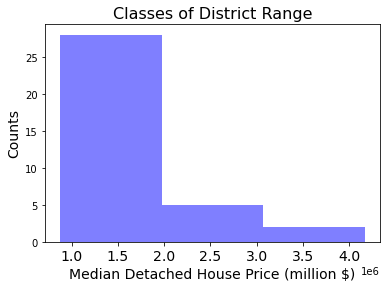

In [7]:
num_bins = 3
n, bins, patches = plt.hist(Houseprice_df['Med_HousePrice'], num_bins, facecolor='blue', alpha=0.5)
plt.title("Classes of District Range",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Median Detached House Price (million $)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()


The histogram showed that the group counts is skewed towards the lower price class when grouped evenly. Hence there is need to visualize the distribution along the prices and to spot if there are outliers. Hence, a box plot was applied to show the distribution.

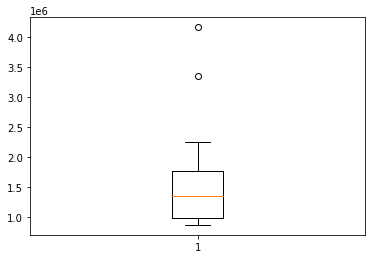

In [8]:
Houseprices = Houseprice_df['Med_HousePrice']
fig =plt.figure(figsize =(6,4))
plt.boxplot(Houseprices)
plt.show()

The box plot showed that distribution is centered mostly above 1 million and below 2 million and that two outliers are at the high end of the House price index. To get the exact values of the inferential statistics, the describe function was applied as follows


In [9]:

Houseprices.describe()

count    3.500000e+01
mean     1.523689e+06
std      7.039664e+05
min      8.750000e+05
25%      9.983055e+05
50%      1.350000e+06
75%      1.775000e+06
max      4.165500e+06
Name: Med_HousePrice, dtype: float64

The 25%, 50% and 75% levels were obtained as approximately 0.998, 1.35 and 1.77 million dollar respectively. Hence the ranges were grouped and applied as follows

Lower Class Area = from 875,000 to 998,305.50

Mid Class Area = from 998,305.50 to 1,775,000

High Class Area = from 1,775,000 to 4,165,500.

The resluting classification is appended as a column to the House price data frame and presented as follows 

In [10]:
level = []
for i in range(0,len(Houseprice_df)):
    if (Houseprice_df['Med_HousePrice'][i] < 983000):
        level.append("Lower Class Area")
    elif (Houseprice_df['Med_HousePrice'][i] >= 983000 and Houseprice_df['Med_HousePrice'][i] < 1775000):
        level.append("Mid Class Area")
    else:
        level.append("High Class Area")   

Houseprice_df['Area Class'] = level
Houseprice_df


,DistrictNo,Neighbourhoods,Med_HousePrice,Latitude,Longitude,Area Class
0,W03,Keelesdale Eglinton West Rockcliffe Smythe Wes...,875000,43.690158,-79.474998,Lower Class Area
1,E09,Scarborough City Centre Woburn Morningside Ben...,890000,43.782601,-79.204958,Lower Class Area
2,W10,Rexdale Clairville Thistletown - Beaumond Heig...,891500,43.721823,-79.572268,Lower Class Area
3,E04,The Golden Mile Dorset Park Wexford,918000,43.750979,-79.276099,Lower Class Area
4,E10,Rouge (South) Port Union (Centennial Scarborou...,967000,43.768914,-79.187291,Lower Class Area
5,W04,York Glen Park Amesbury (Brookhaven) Pelmo Par...,970000,43.724642,-79.447503,Lower Class Area
6,E11,Rouge (West) Malvern Rouge Upper Rouge,975000,43.809196,-79.221701,Lower Class Area
7,E08,Scarborough Village Cliffcrest Guildwood,976000,43.725344,-79.229121,Lower Class Area
8,W05,Downsview Humber Summit Humbermede (Emery) Jan...,980111,43.757176,-79.517081,Lower Class Area
9,E07,Agincourt Malvern West Milliken,1016500,43.781969,-79.257689,Mid Class Area


#### Independent Variables- Common Business Venues Analysis

To extract the business venues found in each district, the author's credentials were used to make the request to Foursquare API, and defined as nearby_venues

In [11]:
# @hidden_cell
CLIENT_ID = 'RC4MACHCPGMB3NKQKI1AVF0C1WKHAG0OP5O3HA4OLU12VG3G' # your Foursquare ID
CLIENT_SECRET = 'SB2BRNNYIY4VGMK2GHMNH4BEZBKMMHDDEWZ5Q5HLHJ2XNFHZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

The latitude, longitude and venue category of the venues within a 1000 meters radius of the application co-ordinate was requested for from the Foursquare API.

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The request is applied for each Neighbourhood in each district in Toronto city to create a data set defined Toronto_venues listing the various venues found in each neighbourhood and the venue business type

In [13]:
Toronto_venues = getNearbyVenues(names=df['Neighbourhoods'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
print(Toronto_venues.shape)

Downtown Harbourfront
The Annex Yorkville South Hill
Forest Hill South Oakwood Vaughan Humewood Cedarvale
Bedford Park Lawrence Manor North Toronto
North York Clanton Park Bathurst Manor
Willowdale West Newtonbrook West
Cabbagetown St. Lawrence Market Toronto waterfront
Moore Park Rosedale
Davisville Village Midtown Toronto Mount Pleasant
Leaside Thorncliffe Park Flemingdon Park
York Mills St.Andrew-Windfields Bridle Path
Don Mills Parkwoods Donalda Victoria Village
Newtonbrook East Willowdale East Newtonbrook
Hillcrest Village Bayview Woods-Steeles Bayview Village
Riverdale Danforth (Greektown) Leslieville Blake-Jones
The Beaches Woodbine Corridor East End - Danforth
East York Playter Estates Broadview North (Old East York)
The Golden Mile Dorset Park Wexford
Steeles L'Amoreaux West Tam O'Shanter Sullivan
Birch Cliff Oakridge Hunt Club Cliffside
Agincourt Malvern West Milliken
Scarborough Village Cliffcrest Guildwood
Scarborough City Centre Woburn Morningside Bendale (Cedarbrae)
Rouge

In total the request returned 1881 venues for the 35 districts in Toronto city. A view of first 5 venues is shown as follows

In [14]:
Toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Downtown Harbourfront,43.64008,-79.38015,Harbour Square Park,43.639253,-79.378395,Park
1,Downtown Harbourfront,43.64008,-79.38015,Harbourfront,43.639526,-79.380688,Neighborhood
2,Downtown Harbourfront,43.64008,-79.38015,Lake Ontario,43.638945,-79.379665,Lake
3,Downtown Harbourfront,43.64008,-79.38015,Miku,43.641374,-79.377531,Japanese Restaurant
4,Downtown Harbourfront,43.64008,-79.38015,BeaverTails,43.639736,-79.380068,Dessert Shop


The total number of venue categories found in each District Neighbourhoods in alphebetical order was returned as follows 

In [15]:
Toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt Malvern West Milliken,66,66,66,66,66,66
Bedford Park Lawrence Manor North Toronto,55,55,55,55,55,55
Birch Cliff Oakridge Hunt Club Cliffside,12,12,12,12,12,12
Bloor West Village Baby Point The Junction (Junction Area) High Park North,87,87,87,87,87,87
Cabbagetown St. Lawrence Market Toronto waterfront,100,100,100,100,100,100
Davisville Village Midtown Toronto Mount Pleasant,85,85,85,85,85,85
Don Mills Parkwoods Donalda Victoria Village,72,72,72,72,72,72
Downsview Humber Summit Humbermede (Emery) Jane and Finch (Black Creek or Glenfield-Jane Heights),32,32,32,32,32,32
Downtown Harbourfront,100,100,100,100,100,100


The total number of unique venue category was determined as  

In [16]:
print('{} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

246 uniques categories.


A new data set was created, defined as Toronto_onehot, to show the one hot encoding neighbourhood against the venue categories. The first 5 entry in the data set is shown as

In [17]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
first_column =Toronto_onehot.pop('Neighborhood')

Toronto_onehot.insert(0, 'Neighborhood', first_column)

print(Toronto_onehot.shape)
Toronto_onehot.head()

(1884, 246)


,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Stadium,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pide Place,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Syrian Restaurant,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Downtown Harbourfront,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

There are 1881 neighbourhood venues and 248 distinct business venue categories. In order to group the business venues by districts in line with the objective of the study, the neighbourhood venues were grouped and the average of each business category obtained to get a new data set defined as Toronto_grouped. The first 5 entry of Toronto_grouped was shown as  

In [18]:
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
print(Toronto_grouped.shape)
Toronto_grouped.head()

(35, 246)


,Neighborhood,Accessories Store,Afghan Restaurant,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Stadium,College Theater,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Hong Kong Restaurant,Hookah Bar,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Pakistani Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pide Place,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Rental Car Location,Restaurant,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoothie Shop,Snack Place,Soccer Field,Soccer Stadium,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Syrian Restaurant,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt Malvern West Milliken,0.0,0.0,0.015152,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.030303,0.030303,0.015152,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.015152,0.00,0.0,0.0,0.0,0.015152,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.0,0.0,0.015152,0.0,0.0,0.0,0.015152,0.0,0.0,0.0,0.121212,0.0,0.060606,0.000000,0.0,0.0,0.0,0.0,0.000000,0.015152,0.0,0.0,0.0,0.00,0.015152,0.0

In order to determine the most common business venues in each of the district, a new data frame was created by sorting the business venues and creating columns according to the number of top venues 

In [19]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

The number of top venue was set at 10, to get the 10 most common venue for each district, with the first 5 rows shown as

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Toronto_grouped['Neighborhood']

for ind in np.arange(Toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt Malvern West Milliken,Clothing Store,Restaurant,Coffee Shop,Gym / Fitness Center,Department Store,Sandwich Place,Gym,Shopping Mall,Sporting Goods Shop,Bank
1,Bedford Park Lawrence Manor North Toronto,Sushi Restaurant,Italian Restaurant,Coffee Shop,Bakery,Pizza Place,Bank,Asian Restaurant,Fast Food Restaurant,Pub,Sandwich Place
2,Birch Cliff Oakridge Hunt Club Cliffside,Park,Convenience Store,General Entertainment,Skating Rink,Café,Diner,Restaurant,Thai Restaurant,College Stadium,Gym
3,Bloor West Village Baby Point The Junction (Ju...,Café,Grocery Store,Coffee Shop,Italian Restaurant,Bar,Bakery,Thai Restaurant,Mexican Restaurant,Restaurant,Breakfast Spot
4,Cabbagetown St. Lawrence Market Toronto waterf...,Coffee Shop,Café,Restaurant,Grocery Store,Diner,Pizza Place,Thai Restaurant,Park,Pharmacy,Indian Restaurant


In order to determine groups of districts with similar characteristics of most common venues, the districts were clustered using K-means cluster algorithms. To achieve this the neighborhood column was dropped from the data frame in order to leave only numerical units for analysis.


In [21]:

Toronto_grouped_clustering = Toronto_grouped.drop('Neighborhood', 1)


The K-means algorithm requires establishing the optimal value of k for the unsupervised learning iterations. This value of k determines the number of clusters for optimal grouping and it was determined using the elbow method.

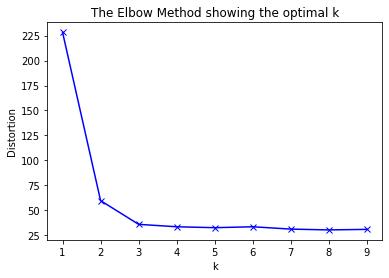

In [22]:


from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(Toronto_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(Toronto_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / Toronto_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.


# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



The optimal value of k is 1 using the elbow graph method for various runs with different radius values. This implies that one group is the optimal cluster for the data frame. However, for the purpose of the study we applied k to be 3 in line with the class category of the Distract to investigate any inherent relationship. This produced the following array of values from 0 to 2 for the 35 districts.

In [23]:
kclusters = 3 
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels


array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1,
       1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int32)

The house price data frame was merged to the sorted district venues in order to attach the k-means obtained cluster labels accordingly. A new data frame given as Toronto merged emerged  

In [24]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Toronto_merged = Houseprice_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Toronto_merged = Toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhoods')

Toronto_merged
# check the last columns!

,DistrictNo,Neighbourhoods,Med_HousePrice,Latitude,Longitude,Area Class,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,W03,Keelesdale Eglinton West Rockcliffe Smythe Wes...,875000,43.690158,-79.474998,Lower Class Area,1,Furniture / Home Store,Intersection,Convenience Store,Discount Store,Sandwich Place,Grocery Store,Thrift / Vintage Store,Coffee Shop,Dessert Shop,Fast Food Restaurant
1,E09,Scarborough City Centre Woburn Morningside Ben...,890000,43.782601,-79.204958,Lower Class Area,0,Park,Coffee Shop,Tennis Court,Mobile Phone Shop,Pharmacy,Burger Joint,Sandwich Place,Curling Ice,Café,Fast Food Restaurant
2,W10,Rexdale Clairville Thistletown - Beaumond Heig...,891500,43.721823,-79.572268,Lower Class Area,2,Fast Food Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Bakery,Park,Dog Run,Fish & Chips Shop,Filipino Restaurant,Cosmetics Shop
3,E04,The Golden Mile Dorset Park Wexford,918000,43.750979,-79.276099,Lower Class Area,1,Asian Restaurant,Pharmacy,Chinese Restaurant,Coffee Shop,Indian Restaurant,Fast Food Restaurant,Hookah Bar,Gaming Cafe,Pizza Place,Pet Store
4,E10,Rouge (South) Port Union (Centennial Scarborou...,967000,43.768914,-79.187291,Lower Class Area,1,Breakfast Spot,Pizza Place,Restaurant,Bank,Fast Food Restaurant,Park,Supermarket,Mexican Restaurant,Sports Bar,Food & Drink Shop
5,W04,York Glen Park Amesbury (Brookhaven) Pelmo Par...,970000,43.724642,-79.447503,Lower Class Area,1,Clothing Store,Fast Food Restaurant,Women's Store,Dessert Shop,Coffee Shop,Furniture / Home Store,Toy / Game Store,Discount Store,Restaurant,Electronics Store
6,E11,Rouge (West) Malvern Rouge Upper Rouge,975000,43.809196,-79.221701,Lower Class Area,2,Fast Food Restaurant,Park,Pharmacy,Pizza Place,Grocery Store,Bubble Tea Shop,Salon / Barbershop,Supermarket,Skating Rink,Sandwich Place
7,E08,Scarborough Village Cliffcrest Guildwood,976000,43.725344,-79.229121,Lower Class Area,0,Ice Cream Shop,Bank,Discount Store,Sandwich Place,Gas Station,Bistro,Liquor Store,Trail,Coffee Shop,Park
8,W05,Downsview Humber Summit Humbermede (Emery) Jan...,980111,43.757176,-79.517081,Lower Class Area,0,Hotel,Coffee Shop,Grocery Store,Discount Store,Theater,Pizza Place,Fast Food Restaurant,Vietnamese Restaurant,Gas Station,Sandwich Place
9,E07,Agincourt Malvern West Milliken,1016500,43.781969,-79.257689,Mid Class Area,1,Clothing Store,Restaurant,Coffee Shop,Gym / Fitness Center,Department Store,Sandwich Place,Gym,Shopping Mall,Sporting Goods Shop,Bank


#### 3.3 Analysis Testing
K-means cluster algorithm

In order to test if the K-means obtained cluster grouping has any significant relationship with the District classes, the best fit of the cluster array is required to be determined before application in the testing tool. Comparing the Cluster labels and the Area Class columns the best fit is 

0 = Lower Class Area
1 = Mid Class Area
2 = High Class Area

Hence the prediction of the k-means cluster classification of districts in Toronto City was tagged as y_kclass for the first 5 rows is shown as


In [25]:
y_kclass = Toronto_merged['Cluster Labels']
y_kclass.head()

0    1
1    0
2    2
3    1
4    1
Name: Cluster Labels, dtype: int32

In order to measure the accuracy of the k-means custer classification, by comparison, the actual district classification in the house price data frame (dependent variable) was converted to the respective integer numbers, that is, Lower Class Area = O, Mid Class Area = 1, High Class Area = 2. The first 5 row is shown as follows

In [26]:
y = Houseprice_df['Area Class']
y.replace(to_replace=['Lower Class Area','Mid Class Area', 'High Class Area'], value=[0,1,2],inplace=True)

In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Area Class, dtype: int64

Support Vector Machine

In order to apply the support vector machine the algorithm was supervised by splitting the Toronto_grouped data frame, that is the grouped average of each business category (independent variable), into a training set and a test set. The actual district's area classification (dependent variable was also split into training and test set. Shown as 

In [28]:
X = Toronto_grouped.drop(['Neighborhood'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (28, 245) (28,)
Test set: (7, 245) (7,)


The support vector machine was applied to train the train set and its prediction on the test set is given as follows

In [29]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
y_svm = clf.predict(X_test)
y_svm

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([1, 1, 1, 1, 1, 1, 1])

# 4. Results

f1-score machine learning tool was used to test the accuracy of both the K-means cluster best fit classification and the support vector machine classification of the District's classes, because it conveys the balance between the precision and the recall values. The results were given as follows

The accuracy of the K-means cluster best fit classification was obtained as

In [30]:
f1_score(y, y_kclass,average='micro')

0.4000000000000001

The accuracy of the support vector machine classification was obtained as

In [32]:
f1_score(y_test, y_svm)

0.8333333333333333

The k-means cluster classification of the Districts in toronto city was visualized on the city's map to show the distribution of its classification, using

Red Circle markers - for Lower class districts

Purple Circle markers - for Mid class districts

Green Circle markers - High class districts


In [33]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Latitude'], Toronto_merged['Longitude'], Toronto_merged['Neighbourhoods'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In order to obtain the most common business categories for each district the counts of the top ten venues were collated for every neighbourhood in the districts and presented as  

In [34]:
top10 = Toronto_venues.groupby(['Neighborhood','Venue Category']).size().reset_index(name='Counts')
top10 = top10.sort_values(['Neighborhood','Counts'],ascending=False).groupby('Neighborhood').head(10).reset_index(drop=True)

top10['Join'] = top10['Counts'].map(str) + " " + top10['Venue Category']
top10 = top10.groupby(['Neighborhood'])['Join'].apply(", ".join).reset_index()

top10

,Neighborhood,Join
0,Agincourt Malvern West Milliken,"8 Clothing Store, 5 Restaurant, 4 Coffee Shop,..."
1,Bedford Park Lawrence Manor North Toronto,"4 Sushi Restaurant, 3 Bakery, 3 Coffee Shop, 3..."
2,Birch Cliff Oakridge Hunt Club Cliffside,"3 Park, 1 Café, 1 College Stadium, 1 Convenien..."
3,Bloor West Village Baby Point The Junction (Ju...,"6 Café, 4 Coffee Shop, 4 Grocery Store, 3 Bake..."
4,Cabbagetown St. Lawrence Market Toronto waterf...,"9 Coffee Shop, 5 Café, 5 Grocery Store, 5 Rest..."
5,Davisville Village Midtown Toronto Mount Pleasant,"9 Coffee Shop, 6 Italian Restaurant, 5 Café, 5..."
6,Don Mills Parkwoods Donalda Victoria Village,"7 Clothing Store, 6 Coffee Shop, 4 Fast Food R..."
7,Downsview Humber Summit Humbermede (Emery) Jan...,"4 Hotel, 2 Coffee Shop, 2 Discount Store, 2 Fa..."
8,Downtown Harbourfront,"8 Hotel, 7 Coffee Shop, 6 Café, 4 Park, 4 Rest..."
9,East York Playter Estates Broadview North (Old...,"3 Coffee Shop, 3 Pizza Place, 3 Sandwich Place..."


In order to determine the top business categories in the three classes of the district, that is lower, Mid and High classes, the 1st Most common venues was determined of all the three classes and presented in a bar chart as follows

In [35]:
count_venue = Toronto_merged
count_venue = count_venue.drop(['DistrictNo','Neighbourhoods','Med_HousePrice', 'Cluster Labels'], axis=1)
count_venue = count_venue.groupby(['Area Class','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Area Class', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)


1st Most Common Venue,Asian Restaurant,Bakery,Breakfast Spot,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Fast Food Restaurant,Furniture / Home Store,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Liquor Store,Park,Restaurant,Sushi Restaurant
0,0,0,0,0,0,0,5,0,0,0,1,0,1,1,0,0,0,1
1,1,0,1,0,0,1,0,0,2,1,1,1,0,0,0,1,0,0
2,0,1,0,1,1,2,7,1,0,0,0,0,0,1,1,1,1,0


The group classes of the 1st Most Common businesses in each district was achieved by re-indexing and rearranging to give a clear illustration when plotted on a bar chart

In [41]:
groups = cv_cluster.reindex([1,2,0])
Class_groups = groups.rename(index={1: 'Lower Class Districts', 2: 'Mid Class Districts', 0: 'High Class Districts' })
Class_groups

1st Most Common Venue,Asian Restaurant,Bakery,Breakfast Spot,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Fast Food Restaurant,Furniture / Home Store,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Liquor Store,Park,Restaurant,Sushi Restaurant
Lower Class Districts,1,0,1,0,0,1,0,0,2,1,1,1,0,0,0,1,0,0
Mid Class Districts,0,1,0,1,1,2,7,1,0,0,0,0,0,1,1,1,1,0
High Class Districts,0,0,0,0,0,0,5,0,0,0,1,0,1,1,0,0,0,1


Text(0, 0.5, 'Counts')

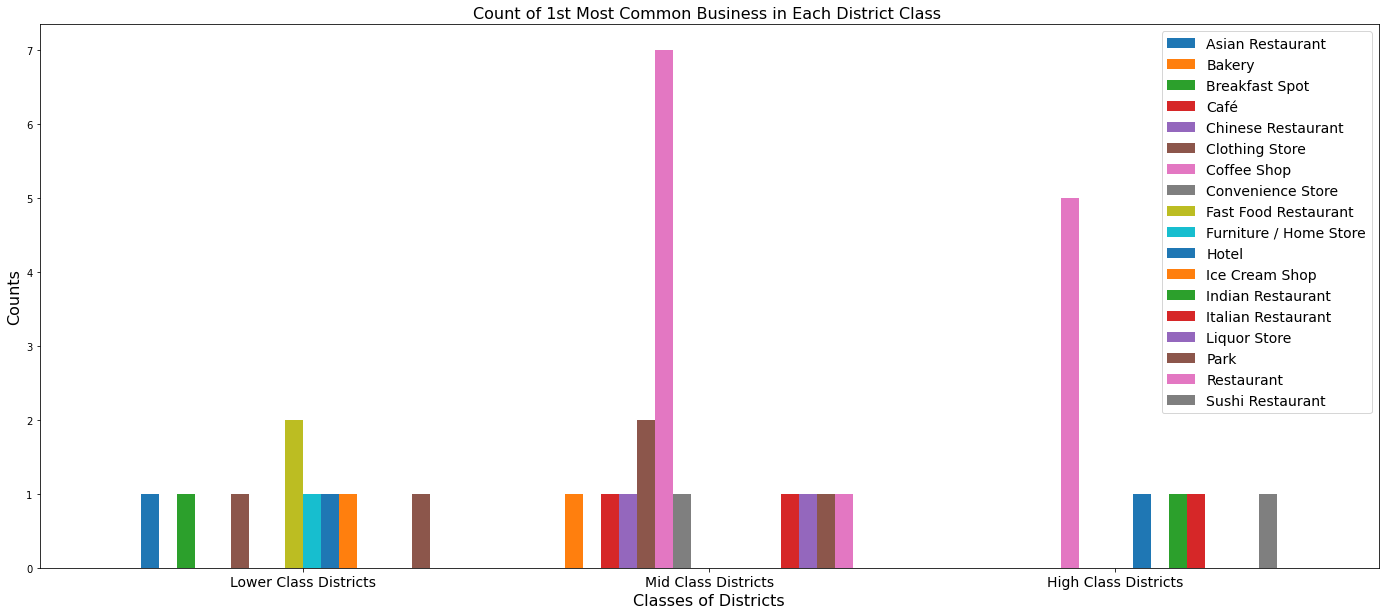

In [44]:
frame=Class_groups.plot(kind='bar',figsize=(24,10),width = 0.8)

plt.legend(labels=Class_groups.columns,fontsize= 14)
plt.title("Count of 1st Most Common Business in Each District Class ",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Classes of Districts', fontsize=16)
plt.ylabel('Counts', fontsize=16)

To obtain a comprehensive table of the result containing: the districts of Toronto City by District Numbers; the district's co-ordinates; 1st to 10th most common venues; the median house price index; the districts class categorization; and the count of the top business joined for each neighbourhoods in the district, the Toronto_merged data frame was merged with the top 10 data frame

In [37]:
result = pd.merge(Toronto_merged, 
                    top10[['Neighborhood', 'Join']],
                    left_on = 'Neighbourhoods',
                    right_on = 'Neighborhood',
                    how = 'left')

In [38]:
result = result.drop(['Neighborhood'], axis=1)

result


,DistrictNo,Neighbourhoods,Med_HousePrice,Latitude,Longitude,Area Class,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Join
0,W03,Keelesdale Eglinton West Rockcliffe Smythe Wes...,875000,43.690158,-79.474998,Lower Class Area,1,Furniture / Home Store,Intersection,Convenience Store,Discount Store,Sandwich Place,Grocery Store,Thrift / Vintage Store,Coffee Shop,Dessert Shop,Fast Food Restaurant,"3 Furniture / Home Store, 3 Intersection, 2 Co..."
1,E09,Scarborough City Centre Woburn Morningside Ben...,890000,43.782601,-79.204958,Lower Class Area,0,Park,Coffee Shop,Tennis Court,Mobile Phone Shop,Pharmacy,Burger Joint,Sandwich Place,Curling Ice,Café,Fast Food Restaurant,"2 Coffee Shop, 2 Park, 1 Burger Joint, 1 Café,..."
2,W10,Rexdale Clairville Thistletown - Beaumond Heig...,891500,43.721823,-79.572268,Lower Class Area,2,Fast Food Restaurant,Pizza Place,Coffee Shop,Sandwich Place,Bakery,Park,Dog Run,Fish & Chips Shop,Filipino Restaurant,Cosmetics Shop,"2 Fast Food Restaurant, 1 Bakery, 1 Coffee Sho..."
3,E04,The Golden Mile Dorset Park Wexford,918000,43.750979,-79.276099,Lower Class Area,1,Asian Restaurant,Pharmacy,Chinese Restaurant,Coffee Shop,Indian Restaurant,Fast Food Restaurant,Hookah Bar,Gaming Cafe,Pizza Place,Pet Store,"2 Asian Restaurant, 2 Chinese Restaurant, 2 Co..."
4,E10,Rouge (South) Port Union (Centennial Scarborou...,967000,43.768914,-79.187291,Lower Class Area,1,Breakfast Spot,Pizza Place,Restaurant,Bank,Fast Food Restaurant,Park,Supermarket,Mexican Restaurant,Sports Bar,Food & Drink Shop,"3 Breakfast Spot, 3 Pizza Place, 2 Bank, 2 Fas..."
5,W04,York Glen Park Amesbury (Brookhaven) Pelmo Par...,970000,43.724642,-79.447503,Lower Class Area,1,Clothing Store,Fast Food Restaurant,Women's Store,Dessert Shop,Coffee Shop,Furniture / Home Store,Toy / Game Store,Discount Store,Restaurant,Electronics Store,"10 Clothing Store, 5 Fast Food Restaurant, 3 C..."
6,E11,Rouge (West) Malvern Rouge Upper Rouge,975000,43.809196,-79.221701,Lower Class Area,2,Fast Food Restaurant,Park,Pharmacy,Pizza Place,Grocery Store,Bubble Tea Shop,Salon / Barbershop,Supermarket,Skating Rink,Sandwich Place,"3 Fast Food Restaurant, 3 Park, 2 Grocery Stor..."
7,E08,Scarborough Village Cliffcrest Guildwood,976000,43.725344,-79.229121,Lower Class Area,0,Ice Cream Shop,Bank,Discount Store,Sandwich Place,Gas Station,Bistro,Liquor Store,Trail,Coffee Shop,Park,"2 Ice Cream Shop, 1 Bank, 1 Bistro, 1 Coffee S..."
8,W05,Downsview Humber Summit Humbermede (Emery) Jan...,980111,43.757176,-79.517081,Lower Class Area,0,Hotel,Coffee Shop,Grocery Store,Discount Store,Theater,Pizza Place,Fast Food Restaurant,Vietnamese Restaurant,Gas Station,Sandwich Place,"4 Hotel, 2 Coffee Shop, 2 Discount Store, 2 Fa..."
9,E07,Agincourt Malvern West Milliken,1016500,43.781969,-79.257689,Mid Class Area,1,Clothing Store,Restaurant,Coffee Shop,Gym / Fitness Center,Department Store,Sandwich Place,Gym,Shopping Mall,Sporting Goods Shop,Bank,"8 Clothing Store, 5 Restaurant, 4 Coffee Shop,..."


# 5. Discussion

The results showed that the accuracy of the K-mean cluster algorithm is weak 40% and hence not significant is describing the relationship between venues found in a district and the class category of the district. From the plotting of the clusters on the map, it is obvious that the cluster groups represents other descriptions perhaps based on geographic location rather than how expensive the neighbourhoods of the districts are. 

However, modeling the business venue categories by supervision, that is, training the categories in line with the determined class categories produced a significant accuracy 83.3%, where the support vector machine was used.

From the over 240 unique business categories only 18 represented the top common business across the 35 districts.
There are various distinctive characteristics found in the distribution of most common businesses amongst the classes of the districts. For instance European restaurants, especially Italian, are mostly found more in expense districts and less as the distrist becomes less expensive.  

Hence, if an investor is interested in opening an Italian restaurant in Toronto City, this report would recommend siting it in a Lower class district if the investor is averse to competition. This is because there are much fewer Italian restaurants in the Lower class . However if the investor has a business edge and not averse to competition or intends to be a service provider to Italian restaurants, then most certainly, the higher class districts should be more favourable. 

The 1st most common business venue among High and Mid class districts are Coffee Shops and the 1st most common business venue among Lower and Mid class districts are Clothing Shops.

# 6. Conclusions

The classes of the districts in Toronto City can be defined by the most common business categories. This evidenced by the finding that given the most common business venue categories found in a district, a trained set can predict the class of the district with accuracy of up to 83.3%. Also there is no 1st most common business venue category that is uniquely prominent in all 3 classes of the districts studied. The 1st most common business venue category that is prominent in more than one class, is mostly among High and Mid class or Lower and mid classes.


Coffee Shops are the by far the top business category found in Mid class districts. Coffee shops are also the most vastly found business in high class district but as copious as in mid class districts. Fast food restaurants are the most prominent businesses in Lower class districts but marginally. 

